# Day 6 - Voronoi diagram

<figure style="float: right; max-width: 25em; margin: 1em">
<img src="https://upload.wikimedia.org/wikipedia/commons/6/6d/Manhattan_Voronoi_Diagram.svg"
     alt="Manhattan Voronoi diagram illustration from Wikimedia"/>
<figcaption style="font-style: italic; font-size: smaller">

Manhattan Voronoi diagram  
Balu Ertl [<a href="https://creativecommons.org/licenses/by-sa/1.0">CC BY-SA 1.0</a>],<br/><a href="https://commons.wikimedia.org/wiki/File:Manhattan_Voronoi_Diagram.svg">from Wikimedia Commons</a>

</figcaption>
</figure>

* [Day 6](https://adventofcode.com/2018/day/6)

Another computational geometry problem! This time we are asked to find the largest area in a [Voronoi diagram](https://en.wikipedia.org/wiki/Voronoi_diagram).

The most efficient algorithm to produce the boundaries between the points ($O(n \log_2 n)$) is [Fortune's algorithm](https://en.wikipedia.org/wiki/Fortune%27s_algorithm), which (like [day 3](./Day%2003.ipynb)) is a [sweep line algorithm](https://en.wikipedia.org/wiki/Sweep_line_algorithm) to reduce the problem from 2 to 1 dimension. *But*, we don't need boundaries,  we need *area*. A simpler method is to just use a $O(kn)$ double loop to find which of $n$ elements is closest for each of the $k$ `(x, y)` points in the map.


There are three importand aspects to remember here:

1. we need to use [Manhattan distance](https://en.wikipedia.org/wiki/Taxicab_geometry), not Euclidian distance, when doing our calculations.

2. If 2 or more coordinates are equidistant from a given `(x, y)` point, that point doesn't count as area for any of the coordinates. This means we can't just use `min()` here, and `sort()` would be needlessly precise. Instead, we only need to know the *top 2 smallest distances*; if these two are equidistance we know we can't give the area to anyone. To get the two N of anything, you'd want to use a [heap queue](https://docs.python.org/3/library/heapq.html#heapq.nsmallest), which gives us the result in $O(n)$ time rather than $O(n \log_2 n)$. Or, for numpy arrays, use the [`numpy.partition()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.partition.html) function; we just want to group the top two separate from the remainder, it doesn't matter if they are ordered any further, after all.

3. Per coordinate we need to track if their area stretches to infinity, so we can disqualify them from consideration when we ask for the maximum area. Any coordinate that can claim a `(x, y)` point on the boundaries (defined as the min and max x and y coordinates) can be expected to stretch to infinity.

All computations can be done with numpy arrays, and the distance calculations can be done for all points for the whole matrix in one step with the Scipy [`scipy.spacial.distance.cdist()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html) function, which directly supports calculating Manhattan distances.

As inputs we need

- an array for all the `(x, y)` positions for the coordinates

    <table>
      <thead>
        <tr><th>#</th><th>x</th><th>y</th></tr>
      </thead>
      <tbody>
        <tr><th>0</th><td>1</td><td>1</td></tr>
        <tr><th>1</th><td>1</td><td>6</td></tr>
        <tr><th>⋮</th><td>⋮</td><td>⋮</td></tr>
        <tr><th>5</th><td>8</td><td>9</td></tr>
      </tbody>
    </table>
    
- an array of all possible `(x, y)` coordinates for the grid
  bounded the min and max x, y coordinates of the input coordinates

    <table>
      <thead>
        <tr><th>#</th><th>x</th><th>y</th></tr>
      </thead>
      <tbody>
        <tr><th>0</th><td>1</td><td>1</td></tr>
        <tr><th>1</th><td>2</td><td>1</td></tr>
        <tr><th>2</th><td>3</td><td>1</td></tr>
        <tr><th>⋮</th><td>⋮</td><td>⋮</td></tr>
        <tr><th>55</th><td>7</td><td>8</td></tr>
      </tbody>
    </table>

Given these, `cdist()` will give us a big matrix with all distances:

<table>
  <thead>
    <tr><th>#</th><th>distances</th></tr>
  </thead>
  <tbody>
    <tr><th>0</th><td>
      <table>
        <thead>
          <tr><th></th><th>0</th><th>1</th><th>2</th><th>3</th><th>4</th><th>5</th><th>6</th></tr></thead>
        <tbody>
          <tr><th>0</th><td>0.0</td><td>1.0</td><td>2.0</td><td>3.0</td><td>4.0</td><td>5.0</td><td>6.0</td></tr>
          <tr><th>1</th><td>1.0</td><td>2.0</td><td>3.0</td><td>4.0</td><td>5.0</td><td>6.0</td><td>7.0</td></tr>
          <tr><th>⋮</th><td>⋮</td><td>⋮</td><td>⋮</td><td>⋮</td><td>⋮</td><td>⋮</td><td>⋮</td></tr>
          <tr><th>7</th><td>7.0</td><td>8.0</td><td>9.0</td><td>10.0</td><td>11.0</td><td>12.0</td><td>13.0</td></tr>
        </tbody>
      </table>
    </td></tr>
    <tr><th>1</th><td>
      <table>
        <thead>
          <tr><th></th><th>0</th><th>1</th><th>2</th><th>3</th><th>4</th><th>5</th><th>6</th></tr>
        </thead>
        <tbody>
          <tr><th>0</th><td>5.0</td><td>6.0</td><td>7.0</td><td>8.0</td><td>9.0</td><td>10.0</td><td>11.0</td></tr>
          <tr><th>1</th><td>4.0</td><td>5.0</td><td>6.0</td><td>7.0</td><td>8.0</td><td>9.0</td><td>10.0</td></tr>
          <tr><th>⋮</th><td>⋮</td><td>⋮</td><td>⋮</td><td>⋮</td><td>⋮</td><td>⋮</td><td>⋮</td></tr>
          <tr><th>7</th><td>2.0</td><td>3.0</td><td>4.0</td><td>5.0</td><td>6.0</td><td>7.0</td><td>8.0</td></tr>
        </tbody>
      </table>
    </td></tr>
    <tr><th>⋮</th><td>⋮</td></tr>
    <tr><th>5</th><td>
      <table>
        <thead>
          <tr><th></th><th>0</th><th>1</th><th>2</th><th>3</th><th>4</th><th>5</th><th>6</th></tr>
        </thead>
        <tbody>
          <tr><th>0</th><td>15.0</td><td>14.0</td><td>13.0</td><td>12.0</td><td>11.0</td><td>10.0</td><td>9.0</td></tr>
          <tr><th>1</th><td>14.0</td><td>13.0</td><td>12.0</td><td>11.0</td><td>10.0</td><td>9.0</td><td>8.0</td></tr>
          <tr><th>⋮</th><td>⋮</td><td>⋮</td><td>⋮</td><td>⋮</td><td>⋮</td><td>⋮</td><td>⋮</td></tr>
          <tr><th>7</th><td>8.0</td><td>7.0</td><td>6.0</td><td>5.0</td><td>4.0</td><td>3.0</td><td>2.0</td></tr>
        </tbody>
      </table>
    </td></tr>
  </tbody>
</table>

All that then remains to be done is find the *ids* of the input coordinates (integer index) that have the lowest distance at each point, remove the points at which the lowest distance and second lowest distance are equal (contested distances), remove the ids that claim area at the edges (those have infinite area), then count the ids and return the highest of those counts.

In [1]:
import numpy as np
from scipy.spatial import distance

def _manhattan_distances_matrix(coords):
    """Produce a len(coords) matrix of manhattan distances at all possible x, y"""
    x = np.arange(coords[..., 0].min(), coords[..., 0].max() + 1)
    y = np.arange(coords[..., 1].min(), coords[..., 1].max() + 1)
    # arrays with len(x) x len(y) x and y coordinates
    xx, yy = np.meshgrid(x, y)
    # array of all possible [x, y]
    all_xy = np.stack((xx, yy), axis=-1).reshape(-1, 2)
    
    # calculate distances for all points at all coordinates; essentially a
    # len(coordinates) set of matrices of distances
    return distance.cdist(coords, all_xy, metric='cityblock').reshape(-1, *xx.shape)

def _claimed_area(coords):
    """matrix of claimed areas by id; -1 is used to mark equidistanc areas.
    """
    distances = _manhattan_distances_matrix(coords)

    # What coordinate ids win for a given x, y position?
    coord_ids = distances.argmin(axis=0)
    
    # whereever the top and second best distance are the same, clear the
    # claim for a candidate id
    candidate, next_ = np.partition(distances, 2, axis=0)[:2]
    coord_ids[candidate == next_] = -1
    
    return coord_ids

def find_max_area(coords):
    """How large is the largest non-infinite area covered?"""
    coord_ids = _claimed_area(coords)
    
    # Any candidate id that's at the edge has infinite area, clear those
    # from consideration
    is_infinite = np.union1d(
        # top and bottom
        np.unique(coord_ids[[0, -1], :]),
        # left and right
        np.unique(coord_ids[:, [0, -1]]),
    )
    coord_ids[np.isin(coord_ids, is_infinite)] = -1
    
    # now we have a matrix of all positions on the infinite grid (bounded
    # by the min and max coordinates) with non-infinite areas marked by
    # the id of the coordinates that claim that position. -1 mark spots
    # not claimable or part of an infinite area. All we need to do now is
    # count the ids != -1, and return the maximum
    _, counts = np.unique(coord_ids[coord_ids != -1], return_counts=True)
    return counts.max()

In [2]:
testcoords = np.genfromtxt('''\
1, 1
1, 6
8, 3
3, 4
5, 5
8, 9'''.splitlines(), delimiter=',', dtype=np.int)
assert find_max_area(testcoords) == 17

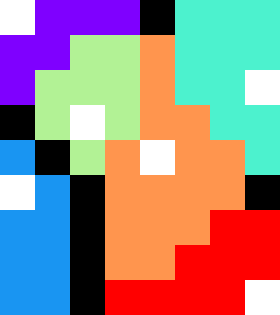

In [3]:
%matplotlib inline
from PIL import Image
import matplotlib.pyplot as plt

def visualise(coords, cmap='rainbow', unclaimed='black', centers='white', ratio=1):
    coord_ids = _claimed_area(coords)
    vmin, vmax = coord_ids[coord_ids != -1].min(), coord_ids.max()

    # mark the coordinate centers with a separate colour; coordinates
    # must first be normalised as we don't necessarily start at 0, 0
    # anymore.
    normalised_coords = coords - coords.min(axis=0)
    coord_ids[tuple(normalised_coords.T)[::-1]] = vmax + 1
    
    # Generate a PIL image, using a matplotlib palette
    # resample a matplotlib colour map to cover our coords count (vmax + 1)
    p = plt.get_cmap(cmap)._resample(vmax + 1)
    # -1 is given one colour
    p.set_under(unclaimed)
    # vmax + 1 another
    p.set_over(centers)
    # map points through the resampled palette
    img = Image.fromarray(p(coord_ids, bytes=True))
    if ratio != 1:
        img = img.resize((int(img.size[0] * ratio), int(img.size[1] * ratio)))
    return img

visualise(testcoords, ratio=35)

In [4]:
import aocd

data = aocd.get_data(day=6, year=2018)
coords = np.genfromtxt(data.splitlines(), delimiter=',', dtype=np.uint)

In [5]:
print('Part 1:', find_max_area(coords))

Part 1: 4060


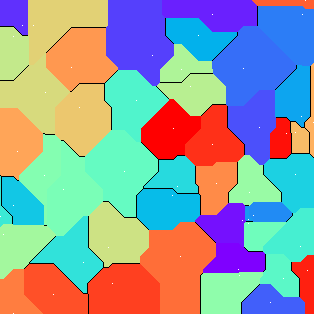

In [6]:
# All the coordinates mapped out:
visualise(coords)

## Part 2

This part is actually easier, we can sum all the distances that `cdist()` gives us for all possible positions, and count how many of these fall below the threshold. Numpy was made for this kind of work.

In [7]:
def area_within_threshold(coords, threshold):
    distances = _manhattan_distances_matrix(coords)
    return (distances.sum(axis=0) < threshold).sum()

In [8]:
testthreshold = 32
assert area_within_threshold(testcoords, testthreshold) == 16

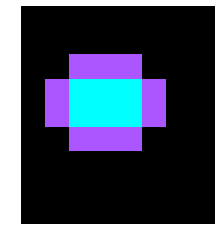

In [9]:
def plot_area(coords, threshold):
    cmap = plt.get_cmap('cool')
    cmap.set_over('black')
    distance = _manhattan_distances_matrix(coords).sum(axis=0)
    plt.axis('off')
    plt.imshow(distance, vmax=threshold - 1, cmap=cmap)

plot_area(testcoords, testthreshold)

In [10]:
threshold = 10000
print('Part 2:', area_within_threshold(coords, threshold))

Part 2: 36136


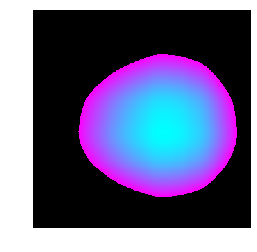

In [11]:
plot_area(coords, threshold)